In [1]:
import numpy as np
import seaborn as sns

In [2]:
# Setup
import importlib
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt

from sccoda.util import comp_ana as mod
from sccoda.util import cell_composition_data as dat
from sccoda.util import data_visualization as viz

import sccoda.datasets as scd

import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = (1,1,1,1)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

2025-04-09 12:57:21.418601: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-09 12:57:21.425600: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-09 12:57:26.107784: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-09 12:57:26.494037: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-09 12:57:29.442905: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [3]:
df_bld = pd.read_csv('/home/yy693/pi_hafler/ASAP/scanpy/241021_BLD_integrate/cellnumber.csv')

In [4]:
# Convert data to anndata object
data_all = dat.from_pandas(df_bld, covariate_columns=["DonorID"])

In [5]:
data_all.obs

,DonorID
0,YPD001
1,YPD002
2,YPD003
3,YPD004
4,YPD005
...,...
68,YPD093
69,YPD094
70,YPD095
71,YPD096


In [6]:
df_meta = pd.read_csv('/home/yy693/pi_hafler/ASAP/scanpy/241021_BLD_integrate/obs.csv', index_col=0)
# df_meta = df_meta.loc[df_bld.sampleid]
# df_meta = df_meta.reset_index()
df_meta.head()

,cellranger_sample_id,SampleID,SampleType,DonorID,Estimated Number of Cells,Mean Reads per Cell,Median Genes per Cell,Number of Reads,Valid Barcodes,Sequencing Saturation,...,majority_voting_Immune_All_Low,predicted_labels_COVID19_HumanChallenge_Blood,over_clustering_COVID19_HumanChallenge_Blood,majority_voting_COVID19_HumanChallenge_Blood,cluster_L1,cluster_L2,Hyposmia,Diagnosis_RBDstrat,Gender,Age
index,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGCTCCTTC-1-YPD001BLD,YPD001BLD_HHT_GEX,YPD001BLD,BLD,YPD001,"6,931","47,589","2,450","329,839,529",90.1%,75.5%,...,Tem/Temra cytotoxic T cells,T CD8 EMRA,291,T CD8 EMRA,T,CD8CD4 Temra,False,HC,Male,79.0
AAACCTGAGGACATTA-1-YPD001BLD,YPD001BLD_HHT_GEX,YPD001BLD,BLD,YPD001,"6,931","47,589","2,450","329,839,529",90.1%,75.5%,...,Classical monocytes,Monocyte CD14+,284,Monocyte CD14+,Myeloid,CD14 Mono,False,HC,Male,79.0
AAACCTGAGGCCCTTG-1-YPD001BLD,YPD001BLD_HHT_GEX,YPD001BLD,BLD,YPD001,"6,931","47,589","2,450","329,839,529",90.1%,75.5%,...,CD16+ NK cells,NK,57,NK,T,CD8CD4 Temra,False,HC,Male,79.0
AAACCTGAGTCCCACG-1-YPD001BLD,YPD001BLD_HHT_GEX,YPD001BLD,BLD,YPD001,"6,931","47,589","2,450","329,839,529",90.1%,75.5%,...,Tem/Trm cytotoxic T cells,T CD8 EM,218,T CD8 EM,T,CD8 Tem,False,HC,Male,79.0
AAACCTGCACGAGAGT-1-YPD001BLD,YPD001BLD_HHT_GEX,YPD001BLD,BLD,YPD001,"6,931","47,589","2,450","329,839,529",90.1%,75.5%,...,Tem/Temra cytotoxic T cells,T CD4 CTL,104,T CD8 CTL,T,CD8CD4 Temra,False,HC,Male,79.0


In [7]:
df_meta = df_meta[['DonorID', 'EnrollmentCategory', 'Age', 'Gender']].drop_duplicates(subset=['DonorID']).reset_index(drop=True)
df_meta['group'] = df_meta['EnrollmentCategory']
df_meta.head()

,DonorID,EnrollmentCategory,Age,Gender,group
0,YPD001,HC,79.0,Male,HC
1,YPD002,HC,59.0,Male,HC
2,YPD003,RBD,58.0,Male,RBD
3,YPD006,RBD,70.0,Male,RBD
4,YPD007,HC,66.0,Female,HC


In [8]:
data_all.obs = pd.merge(data_all.obs, df_meta, on='DonorID', how='left')

In [9]:
data_all.obs

,DonorID,EnrollmentCategory,Age,Gender,group
0,YPD001,HC,79.0,Male,HC
1,YPD002,HC,59.0,Male,HC
2,YPD003,RBD,58.0,Male,RBD
3,YPD004,RBD,68.0,Male,RBD
4,YPD005,RBD,59.0,Male,RBD
...,...,...,...,...,...
68,YPD093,RBD,71.0,Male,RBD
69,YPD094,RBD,74.0,Male,RBD
70,YPD095,PD,76.0,Male,PD
71,YPD096,RBD,69.0,Male,RBD


In [10]:
data_all.obs[data_all.obs.Age.isna()]

,DonorID,EnrollmentCategory,Age,Gender,group


In [11]:
data_all.obs['EnrollmentCategory'].value_counts()

EnrollmentCategory
RBD       34
PD-RBD    14
PD        13
HC        12
Name: count, dtype: int64

In [12]:
data_all.obs['EnrollmentCategory'].unique()

array(['HC', 'RBD', 'PD-RBD', 'PD'], dtype=object)

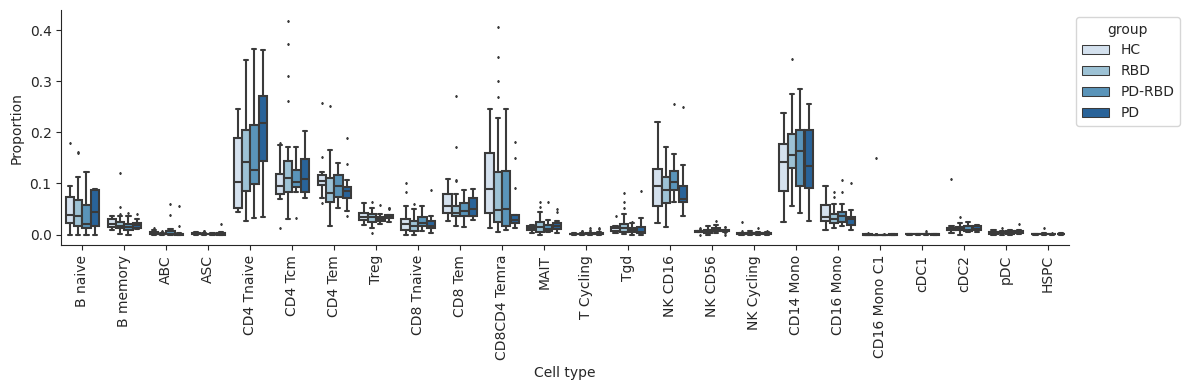

In [13]:
viz.boxplots(data_all, feature_name="group", figsize=(12,4))
sns.despine()
plt.savefig('../scanpy/250407_BLD_downstream/graph/scCODA_box.pdf', bbox_inches='tight')

In [14]:
data_all

AnnData object with n_obs × n_vars = 73 × 24
    obs: 'DonorID', 'EnrollmentCategory', 'Age', 'Gender', 'group'

In [15]:
model = mod.CompositionalAnalysis(data_all, formula="group + Age", reference_cell_type="automatic")

Automatic reference selection! Reference cell type set to NK CD56
Zero counts encountered in data! Added a pseudocount of 0.5.


2025-04-09 13:02:25.056867: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [16]:
# Run MCMC
sim_results = model.sample_hmc()

I0000 00:00:1744218147.915485 3799554 service.cc:146] XLA service 0x148694007640 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744218147.915604 3799554 service.cc:154]   StreamExecutor device (0): Host, Default Version
2025-04-09 13:02:28.004958: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
100%|██████████| 20000/20000 [02:21<00:00, 141.50it/s]


MCMC sampling finished. (179.209 sec)
Acceptance rate: 75.6%


In [17]:
sim_results.summary()

Compositional Analysis summary:

Data: 73 samples, 24 cell types
Reference index: 15
Formula: group + Age

Intercepts:
              Final Parameter  Expected Sample
Cell Type                                     
B naive                 0.393       262.554297
B memory               -0.270       135.295044
ABC                     0.258       229.397867
ASC                    -0.686        89.251471
CD4 Tnaive             -1.103        58.818587
CD4 Tcm                 0.695       355.120762
CD4 Tem                 0.316       243.096360
Treg                   -1.201        53.327807
CD8 Tnaive             -0.698        88.186854
CD8 Tem                -1.103        58.818587
CD8CD4 Temra           -0.353       124.518949
MAIT                    0.407       266.255908
T Cycling               1.240       612.444243
Tgd                     0.596       321.648041
NK CD16                 1.164       567.623250
NK CD56                -1.147        56.286679
NK Cycling              2.430      

In [18]:
sim_results.effect_df.to_csv("../scanpy/250407_BLD_downstream/scCODA_effect.csv")

In [19]:
print(sim_results.credible_effects())

Covariate    Cell Type   
group[T.PD]  B naive         True
             B memory        True
             ABC             True
             ASC             True
             CD4 Tnaive      True
                             ... 
Age          CD16 Mono C1    True
             cDC1            True
             cDC2            True
             pDC             True
             HSPC            True
Name: Final Parameter, Length: 96, dtype: bool


In [20]:
pd.DataFrame(sim_results.credible_effects()).to_csv("../scanpy/250407_BLD_downstream/scCODA_credible.FDR0.05.csv")

In [21]:
pd.DataFrame(sim_results.credible_effects(est_fdr=0.01)).to_csv("../scanpy/250407_BLD_downstream/scCODA_credible.FDR0.01.csv")

## without Age

In [22]:
model = mod.CompositionalAnalysis(data_all, formula="group", reference_cell_type="automatic")
# Run MCMC
sim_results = model.sample_hmc()

Automatic reference selection! Reference cell type set to NK CD56
Zero counts encountered in data! Added a pseudocount of 0.5.


100%|██████████| 20000/20000 [02:03<00:00, 161.65it/s]


MCMC sampling finished. (155.025 sec)
Acceptance rate: 55.8%


In [23]:
sim_results.summary()

Compositional Analysis summary:

Data: 73 samples, 24 cell types
Reference index: 15
Formula: group

Intercepts:
              Final Parameter  Expected Sample
Cell Type                                     
B naive                 0.856       289.242296
B memory                0.376       178.978329
ABC                    -0.846        52.734228
ASC                    -0.923        48.826087
CD4 Tnaive              2.058       962.240800
CD4 Tcm                 1.932       848.325775
CD4 Tem                 1.744       702.935214
Treg                    0.846       286.364287
CD8 Tnaive              0.367       177.374751
CD8 Tem                 1.195       405.964100
CD8CD4 Temra            1.251       429.346691
MAIT                    0.120       138.554636
T Cycling              -0.860        52.001093
Tgd                    -0.076       113.893606
NK CD16                 1.692       667.316690
NK CD56                -0.230        97.637802
NK Cycling             -0.724        59.5

In [24]:
sim_results.effect_df.to_csv("../scanpy/250407_BLD_downstream/scCODA_woAge_effect.FDR0.05.csv")

In [25]:
pd.DataFrame(sim_results.credible_effects()).to_csv("../scanpy/250407_BLD_downstream/scCODA_woAge_credible.FDR0.05.csv")
pd.DataFrame(sim_results.credible_effects(est_fdr=0.01)).to_csv("../scanpy/250407_BLD_downstream/scCODA_woAge_credible.FDR0.01.csv")
pd.DataFrame(sim_results.credible_effects(est_fdr=0.1)).to_csv("../scanpy/250407_BLD_downstream/scCODA_woAge_credible.FDR0.1.csv")
pd.DataFrame(sim_results.credible_effects(est_fdr=0.2)).to_csv("../scanpy/250407_BLD_downstream/scCODA_woAge_credible.FDR0.2.csv")
pd.DataFrame(sim_results.credible_effects(est_fdr=0.3)).to_csv("../scanpy/250407_BLD_downstream/scCODA_woAge_credible.FDR0.3.csv")
pd.DataFrame(sim_results.credible_effects(est_fdr=0.4)).to_csv("../scanpy/250407_BLD_downstream/scCODA_woAge_credible.FDR0.4.csv")

In [26]:
pd.DataFrame(sim_results.credible_effects(est_fdr=0.2))

Final Parameter
Covariate    Cell Type                    
group[T.PD]  B naive                 False
             B memory                False
             ABC                     False
             ASC                     False
             CD4 Tnaive               True
...                                    ...
group[T.RBD] CD16 Mono C1            False
             cDC1                    False
             cDC2                    False
             pDC                     False
             HSPC                    False

[72 rows x 1 columns]

## plot

In [27]:
df_freq =  (data_all.to_df().T / data_all.to_df().sum(axis=1).T).T

list_dis = ['RBD', 'PD', 'PD-RBD']

list_fc = []
for dis in list_dis:
    list_fc.append(list((df_freq.loc[data_all.obs[data_all.obs['group'] == dis].index].mean() / \
    df_freq.loc[data_all.obs[data_all.obs['group'] == 'HC'].index].mean())))

df_fc = pd.DataFrame(list_fc, columns=df_freq.columns, index=list_dis)
df_fc.to_csv("../scanpy/250407_BLD_downstream/scCODA_FC.csv")
df_fc

,B naive,B memory,ABC,ASC,CD4 Tnaive,CD4 Tcm,CD4 Tem,Treg,CD8 Tnaive,CD8 Tem,...,NK CD16,NK CD56,NK Cycling,CD14 Mono,CD16 Mono,CD16 Mono C1,cDC1,cDC2,pDC,HSPC
RBD,0.900496,0.980121,0.421533,0.746192,1.226089,1.320058,0.775866,0.906133,0.634881,0.890954,...,0.855520,1.000800,0.614756,1.214156,0.773550,19.997150,0.724383,0.648186,0.985391,1.655536
PD,0.918853,0.864616,1.905064,1.423633,1.809593,1.183361,0.779390,1.033772,0.811877,0.846139,...,0.864504,1.089401,0.643437,1.036793,0.738091,0.735614,0.807497,0.656124,1.730133,1.456093
PD-RBD,0.779826,0.774466,2.867121,0.465292,1.356000,1.083878,0.834283,0.903938,0.906687,0.803482,...,1.104649,1.559901,0.813342,1.135089,0.954389,0.271471,1.712346,0.630718,1.082013,1.051503


In [28]:
df_freq.sum(axis=1)

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
     ... 
68    1.0
69    1.0
70    1.0
71    1.0
72    1.0
Length: 73, dtype: float64

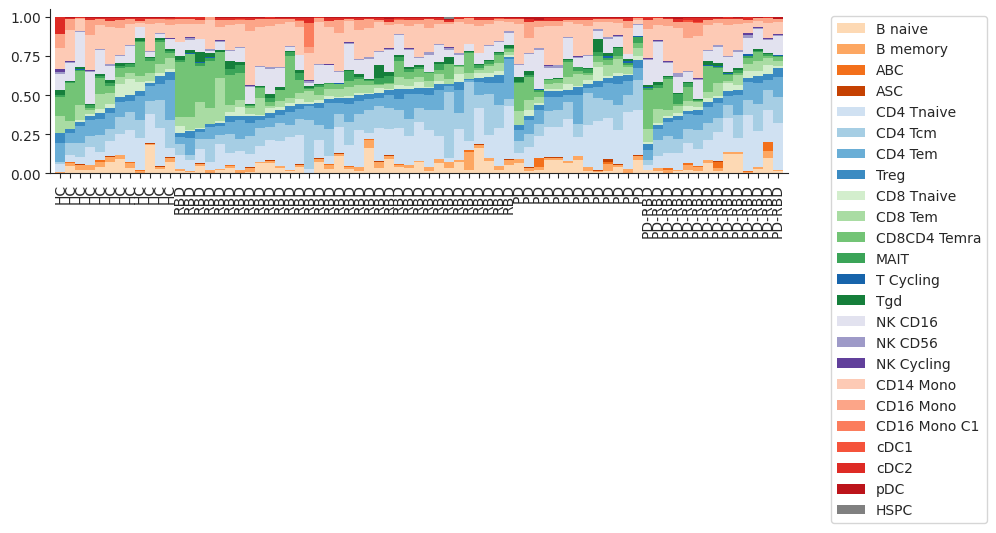

In [29]:
# set category order for data_all.obs['group']
data_all.obs['group'] = pd.Categorical(data_all.obs['group'], categories=['HC', 'RBD', 'PD', 'PD-RBD'])

# Define color palette
colors = ['#fdd9b4', '#fda762', '#f3701b', '#c54102', '#d0e1f2', '#a6cee4',
       '#6aaed6', '#3b8bc2', '#d3eecd', '#a9dca3', '#73c476', '#3ba458',
       '#1764ab', '#157f3b', '#e2e2ef', '#9e9ac8', '#61409b', '#fdcab5',
       '#fca588', '#fb7d5d', '#f5533b', '#de2b25', '#bc141a', '#808080']

df_plot = df_freq.copy()
df_plot['group'] = data_all.obs['group']
df_plot['BCD4T'] = df_plot[['B naive', 'B memory', 'ABC', 'ASC', 'CD4 Tnaive', 'CD4 Tcm', 'CD4 Tem', 'Treg']].sum(axis=1)
df_plot = df_plot.sort_values(by=['group', 'BCD4T']).reset_index(drop=True)
# df_plot = df_plot.drop(['group'], axis=1)

# Create a stacked bar plot
fig, ax = plt.subplots(figsize=(10,4))
bottom = np.zeros(len(df_plot))

# Plot each category with the custom color and width adjustments
bar_width = 1  # Adjust bar width as desired
for i, (col, color) in enumerate(zip(df_plot.drop(['group', 'BCD4T'], axis=1).columns, colors)):
    ax.bar(df_plot.index, df_plot[col], bottom=bottom, label=col, color=color, width=bar_width, linewidth=0)
    bottom += df_plot[col].values

# Position the legend outside the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.xticks(rotation=90)
plt.xticks(range(len(df_plot.index)), df_plot['group'], rotation=90)
plt.tight_layout()
plt.xlim(-1, len(df_plot.index))
sns.despine()
# plt.savefig('../scanpy/250407_BLD_downstream/graph/Cell_freq_per_donor.pdf', bbox_inches='tight')

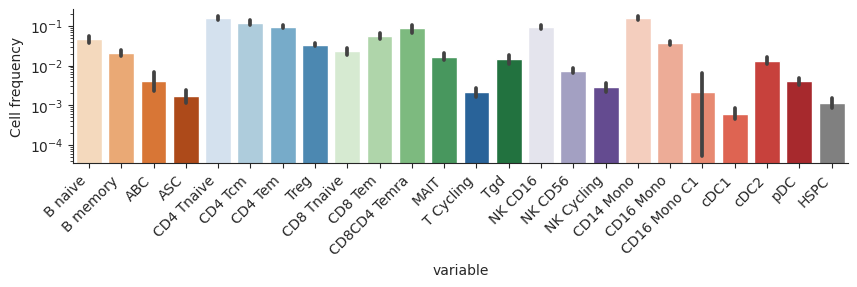

In [30]:
plt.figure(figsize=(10,2))
sns.barplot(df_freq.melt(), y='value', x='variable',  dodge=True, palette=colors)
plt.xticks(rotation=45, ha='right')
sns.despine()
plt.yscale('log')
plt.ylabel('Cell frequency')
plt.savefig('../scanpy/250407_BLD_downstream/graph/Cell_freq.pdf', bbox_inches='tight')

In [31]:
df_bld = pd.read_csv('/home/yy693/pi_hafler/ASAP/scanpy/241021_BLD_integrate/cellnumber.csv')
data_all = dat.from_pandas(df_bld, covariate_columns=["DonorID"])

In [32]:
df_meta = pd.read_csv('../scanpy/250407_BLD_downstream/metadata.csv', index_col=0)
df_meta = df_meta.loc[df_bld.DonorID].reset_index()
df_meta['group'] = df_meta['PD_Probability']
df_meta.head()

,DonorID,Age,Gender,EnrollmentCategory,PD_Probability,Biomarkers_Positive,group
0,YPD001,79.0,Male,HC,HC,HC,HC
1,YPD002,59.0,Male,HC,HC,HC,HC
2,YPD003,58.0,Male,RBD,RBD-LowIntm,RBD-0.0,RBD-LowIntm
3,YPD004,68.0,Male,RBD,RBD-High,RBD-2.0,RBD-High
4,YPD005,59.0,Male,RBD,RBD-LowIntm,RBD-0.0,RBD-LowIntm


In [33]:
df_meta.PD_Probability.value_counts()

PD_Probability
RBD-High       24
PD-RBD         14
PD             13
HC             12
RBD-LowIntm    10
Name: count, dtype: int64

In [34]:
df_meta.PD_Probability.value_counts()

PD_Probability
RBD-High       24
PD-RBD         14
PD             13
HC             12
RBD-LowIntm    10
Name: count, dtype: int64

In [35]:
df_meta[df_meta.PD_Probability == 'RBD']

,DonorID,Age,Gender,EnrollmentCategory,PD_Probability,Biomarkers_Positive,group


In [36]:
data_all.obs = pd.merge(data_all.obs, df_meta, on='DonorID', how='left')

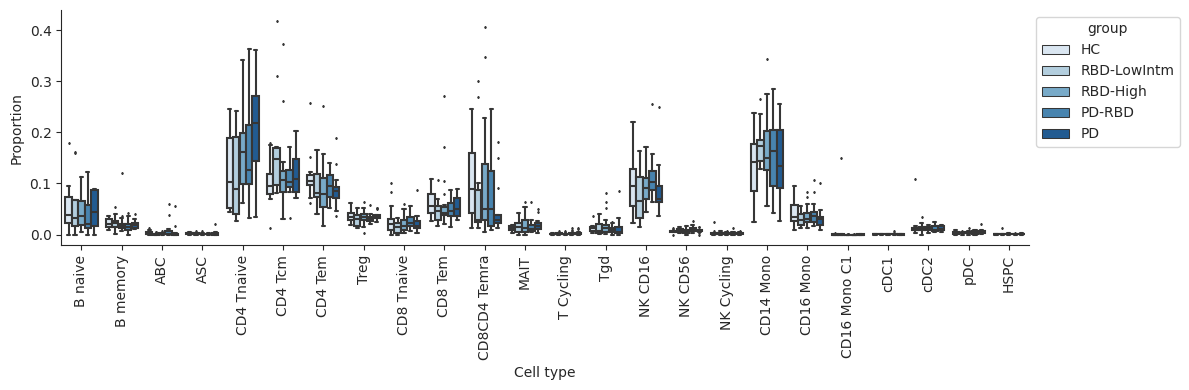

In [37]:
viz.boxplots(data_all, feature_name="group", figsize=(12,4))
sns.despine()
plt.savefig('../scanpy/250407_BLD_downstream/graph/scCODA_split_hyposmia_box.pdf', bbox_inches='tight')

In [38]:
data_all.obs.isna().sum()

DonorID                0
Age                    0
Gender                 0
EnrollmentCategory     0
PD_Probability         0
Biomarkers_Positive    0
group                  0
dtype: int64

In [39]:
model = mod.CompositionalAnalysis(data_all, formula="group", reference_cell_type="automatic")
# Run MCMC
sim_results = model.sample_hmc()

Automatic reference selection! Reference cell type set to NK CD56
Zero counts encountered in data! Added a pseudocount of 0.5.


100%|██████████| 20000/20000 [01:55<00:00, 173.52it/s]


MCMC sampling finished. (146.133 sec)
Acceptance rate: 59.2%


In [40]:
sim_results.summary()

Compositional Analysis summary:

Data: 73 samples, 24 cell types
Reference index: 15
Formula: group

Intercepts:
              Final Parameter  Expected Sample
Cell Type                                     
B naive                 0.826       281.599007
B memory                0.381       180.455480
ABC                    -0.847        52.851394
ASC                    -0.894        50.424849
CD4 Tnaive              2.061       968.243977
CD4 Tcm                 1.919       840.069056
CD4 Tem                 1.723       690.547042
Treg                    0.841       285.854831
CD8 Tnaive              0.385       181.178747
CD8 Tem                 1.212       414.255982
CD8CD4 Temra            1.244       427.726553
MAIT                    0.120       139.001413
T Cycling              -0.834        53.542948
Tgd                    -0.060       116.103740
NK CD16                 1.732       696.790016
NK CD56                -0.233        97.659223
NK Cycling             -0.746        58.4

In [41]:
sim_results.effect_df.to_csv("../scanpy/250407_BLD_downstream/scCODA_split_RBD_woAge_effect.FDR0.05.csv")

In [42]:
pd.DataFrame(sim_results.credible_effects(est_fdr=0.01)).to_csv("../scanpy/250407_BLD_downstream/scCODA_split_RBD_woAge_credible.FDR0.01.csv")
pd.DataFrame(sim_results.credible_effects(est_fdr=0.05)).to_csv("../scanpy/250407_BLD_downstream/scCODA_split_RBD_woAge_credible.FDR0.05.csv")
pd.DataFrame(sim_results.credible_effects(est_fdr=0.1)).to_csv("../scanpy/250407_BLD_downstream/scCODA_split_RBD_woAge_credible.FDR0.1.csv")
pd.DataFrame(sim_results.credible_effects(est_fdr=0.2)).to_csv("../scanpy/250407_BLD_downstream/scCODA_split_RBD_woAge_credible.FDR0.2.csv")
pd.DataFrame(sim_results.credible_effects(est_fdr=0.3)).to_csv("../scanpy/250407_BLD_downstream/scCODA_split_RBD_woAge_credible.FDR0.3.csv")
pd.DataFrame(sim_results.credible_effects(est_fdr=0.4)).to_csv("../scanpy/250407_BLD_downstream/scCODA_split_RBD_woAge_credible.FDR0.4.csv")


In [43]:
df_freq =  (data_all.to_df().T / data_all.to_df().sum(axis=1).T).T

list_dis = ['RBD-LowIntm', 'RBD-High', 'PD', 'PD-RBD']

list_fc = []
for dis in list_dis:
    list_fc.append(list((df_freq.loc[data_all.obs[data_all.obs['group'] == dis].index].mean() / \
    df_freq.loc[data_all.obs[data_all.obs['group'] == 'HC'].index].mean())))

df_fc = pd.DataFrame(list_fc, columns=df_freq.columns, index=list_dis)
df_fc.to_csv("../scanpy/250407_BLD_downstream/scCODA_split_RBD_FC.csv")
df_fc

,B naive,B memory,ABC,ASC,CD4 Tnaive,CD4 Tcm,CD4 Tem,Treg,CD8 Tnaive,CD8 Tem,...,NK CD16,NK CD56,NK Cycling,CD14 Mono,CD16 Mono,CD16 Mono C1,cDC1,cDC2,pDC,HSPC
RBD-LowIntm,1.080833,1.018628,0.433824,0.880102,0.961822,1.730513,0.809926,0.817391,0.501267,0.751500,...,0.737526,1.160244,0.709366,1.267824,0.689022,67.698474,0.484667,0.722551,0.920363,2.613317
RBD-High,0.825356,0.964077,0.416412,0.690397,1.336201,1.149036,0.761675,0.943109,0.690554,0.949060,...,0.904684,0.934365,0.575336,1.191795,0.808770,0.121598,0.824265,0.617201,1.012487,1.256460
PD,0.918853,0.864616,1.905064,1.423633,1.809593,1.183361,0.779390,1.033772,0.811877,0.846139,...,0.864504,1.089401,0.643437,1.036793,0.738091,0.735614,0.807497,0.656124,1.730133,1.456093
PD-RBD,0.779826,0.774466,2.867121,0.465292,1.356000,1.083878,0.834283,0.903938,0.906687,0.803482,...,1.104649,1.559901,0.813342,1.135089,0.954389,0.271471,1.712346,0.630718,1.082013,1.051503


In [44]:
df_freq['group'] = data_all.obs['group']

In [45]:
df_freq

,B naive,B memory,ABC,ASC,CD4 Tnaive,CD4 Tcm,CD4 Tem,Treg,CD8 Tnaive,CD8 Tem,...,NK CD56,NK Cycling,CD14 Mono,CD16 Mono,CD16 Mono C1,cDC1,cDC2,pDC,HSPC,group
0,0.048497,0.018790,0.003400,0.001969,0.043665,0.078024,0.061560,0.029707,0.000716,0.047781,...,0.006263,0.002505,0.196135,0.073550,0.0,0.001253,0.008053,0.001611,0.001432,HC
1,0.041509,0.029288,0.012010,0.002107,0.051833,0.108407,0.105879,0.037927,0.022545,0.095238,...,0.006321,0.001264,0.151180,0.039928,0.0,0.001054,0.008639,0.002739,0.000527,HC
2,0.021610,0.023989,0.001883,0.000297,0.242565,0.145817,0.140563,0.051646,0.023592,0.056701,...,0.008029,0.000991,0.127676,0.013878,0.0,0.000397,0.005650,0.002181,0.001289,RBD-LowIntm
3,0.015979,0.022342,0.002687,0.000848,0.235436,0.129242,0.092619,0.046521,0.004525,0.042279,...,0.016261,0.002687,0.152008,0.056702,0.0,0.000141,0.008343,0.005939,0.000848,RBD-High
4,0.067504,0.014646,0.000110,0.000991,0.128840,0.081709,0.062328,0.028521,0.031164,0.016848,...,0.007708,0.001872,0.264839,0.039533,0.0,0.000440,0.012333,0.001652,0.000991,RBD-LowIntm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,0.013433,0.025560,0.002612,0.000746,0.233022,0.101866,0.086194,0.036194,0.017910,0.045709,...,0.003172,0.001493,0.188060,0.059888,0.0,0.001306,0.014925,0.003172,0.000746,RBD-High
69,0.014493,0.014493,0.000000,0.000000,0.086957,0.072464,0.043478,0.028986,0.043478,0.057971,...,0.000000,0.000000,0.115942,0.028986,0.0,0.000000,0.014493,0.000000,0.000000,RBD-High
70,0.000000,0.030120,0.000000,0.000000,0.361446,0.108434,0.090361,0.036145,0.012048,0.042169,...,0.000000,0.000000,0.162651,0.048193,0.0,0.000000,0.018072,0.006024,0.000000,PD
71,0.019031,0.121107,0.006920,0.000433,0.062284,0.372405,0.016869,0.003460,0.003893,0.037630,...,0.001298,0.000433,0.129758,0.034170,0.0,0.000433,0.007785,0.000865,0.000000,RBD-High


In [48]:
df_plot_rbd = pd.concat([df_freq, data_all.obs], axis=1)
df_plot_rbd = df_plot_rbd[df_plot_rbd['EnrollmentCategory'] == 'RBD']

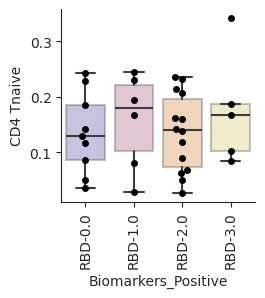

In [49]:
celltype = 'CD4 Tnaive'
plt.figure(figsize=(2.5,2.5))
sns.swarmplot(data=df_plot_rbd, x='Biomarkers_Positive', y=celltype, color='black', size=5, order=['RBD-0.0', 'RBD-1.0','RBD-2.0', 'RBD-3.0'])
sns.boxplot(data=df_plot_rbd, x='Biomarkers_Positive', y=celltype, 
    boxprops=dict(alpha=.3), showfliers=False, 
    order=['RBD-0.0', 'RBD-1.0','RBD-2.0', 'RBD-3.0'],
    palette='CMRmap')
plt.xticks(rotation=90)
sns.despine()